In [21]:
import numpy as np
import pandas as pd
A_a_1=pd.read_csv("[Nut2NHI] data_hw_ver4.csv")
A_a_1_cols=A_a_1.columns

A_a_1_cols_new=['sex','age','ID','year']

for x in A_a_1_cols:
    if x.startswith("HE"):
        A_a_1_cols_new.append(x)
       
A_a_1=A_a_1[A_a_1_cols_new]

A_a_1=A_a_1[A_a_1['age']>=20]



In [22]:
#C: nan in remainders of features deleted

A_a_1=A_a_1[(A_a_1['sex'].notnull())]
A_a_1=A_a_1[(A_a_1['age'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_ht'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_wt'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_wc'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_BMI'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_sbp'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_dbp'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_Upro'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_glu'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_chol'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_TG'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_HDL_st2'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_crea'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_ast'].notnull())]
A_a_1=A_a_1[(A_a_1['HE_alt'].notnull())]

#a: only use data which have values in LDL

A_a_1=A_a_1[A_a_1["HE_LDL_drct"].notnull()]

#1: only use data which have values in A1bc

A_a_1=A_a_1[A_a_1["HE_HbA1c"].notnull()]


In [23]:
import lightgbm 
from lightgbm import LGBMRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score ,mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


dataset_total=A_a_1
dataset_men=A_a_1[A_a_1['sex']==1]
dataset_women=A_a_1[A_a_1['sex']==2]

target_total=dataset_total["age"]
features_total=dataset_total.drop(["age","ID","year"],axis=1)

target_men=dataset_men["age"]
features_men=dataset_men.drop(["sex","age","ID","year"],axis=1)

target_women=dataset_women["age"]
features_women=dataset_women.drop(["sex","age","ID","year"],axis=1)

features_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9376 entries, 23 to 59014
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          9376 non-null   int64  
 1   HE_ht        9376 non-null   float64
 2   HE_wt        9376 non-null   float64
 3   HE_wc        9376 non-null   float64
 4   HE_BMI       9376 non-null   float64
 5   HE_sbp       9376 non-null   float64
 6   HE_dbp       9376 non-null   float64
 7   HE_Upro      9376 non-null   float64
 8   HE_HbA1c     9376 non-null   float64
 9   HE_glu       9376 non-null   float64
 10  HE_chol      9376 non-null   float64
 11  HE_TG        9376 non-null   float64
 12  HE_HDL_st2   9376 non-null   float64
 13  HE_LDL_drct  9376 non-null   float64
 14  HE_crea      9376 non-null   float64
 15  HE_ast       9376 non-null   float64
 16  HE_alt       9376 non-null   float64
dtypes: float64(16), int64(1)
memory usage: 1.3 MB


In [24]:
plt.rcParams["figure.figsize"] = (5, 5)

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.053867
[LightGBM] [Debug] init for col-wise cost 0.000012 seconds, init for row-wise cost 0.001162 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 2553
[LightGBM] [Info] Number of data points in the train set: 6563, number of used features: 17
[LightGBM] [Info] Start training from score 51.289806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 194 and depth = 9
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 139 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 119 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 93 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 128 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 92 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 123 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 118 and depth = 9
[LightGBM] [War

Text(0, 0.5, 'predict')

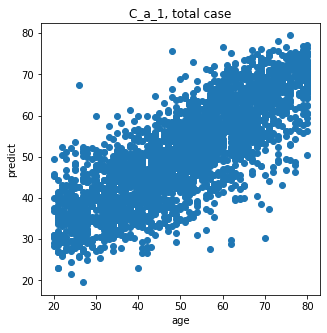

In [25]:


total_x_train, total_x_test, total_y_train, total_y_test= train_test_split(features_total,target_total,test_size=0.3,random_state=200)

lgb_reg_1 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100) 
lgb_reg_1.fit(total_x_train, total_y_train)

answer = pd.DataFrame(total_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_1.predict(total_x_test))
plt.title("C_a_1, total case")
plt.xlabel("age")
plt.ylabel("predict")

In [26]:
data={'sex':[1],
       'HE_ht':[np.nan],
       'HE_wt':[np.nan],
       'HE_wc':[np.nan],
       'HE_BMI':[np.nan],
       'HE_sbp':[np.nan],
       'HE_dbp':[np.nan],
       'HE_Upro':[np.nan],
       'HE_HbA1c':[np.nan],
       'HE_glu':[np.nan],
       'HE_chol':[np.nan],
       'HE_TG':[np.nan],
       'HE_HDL_st2':[np.nan],
       'HE_LDL_drct':[np.nan],
       'HE_crea':[np.nan],
       'HE_ast':[np.nan],
       'HE_alt':[np.nan]}
new_data = pd.DataFrame(data)
lgb_reg_1.predict(new_data)

array([44.43162405])

Text(0.5, 0, 'LgihtGBM Feature of total Importance in C_a_1')

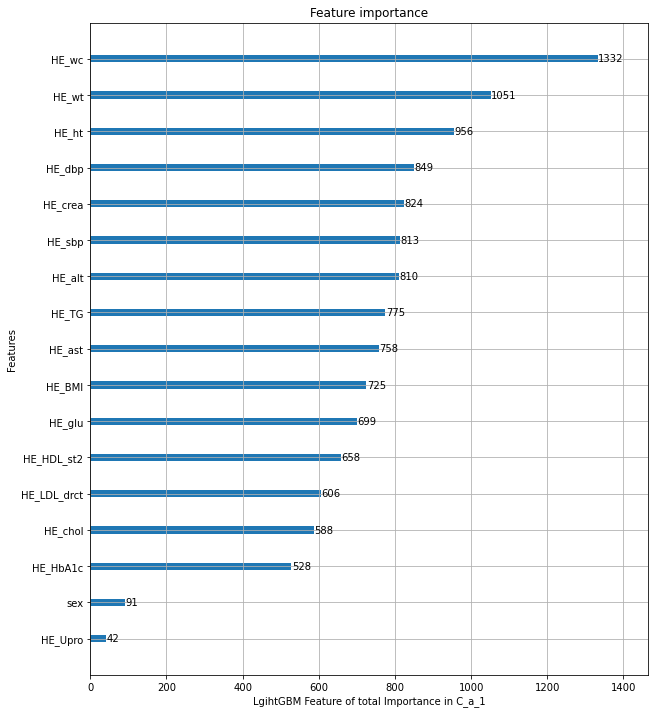

In [27]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_1, ax=ax)
plt.xlabel("LgihtGBM Feature of total Importance in C_a_1")

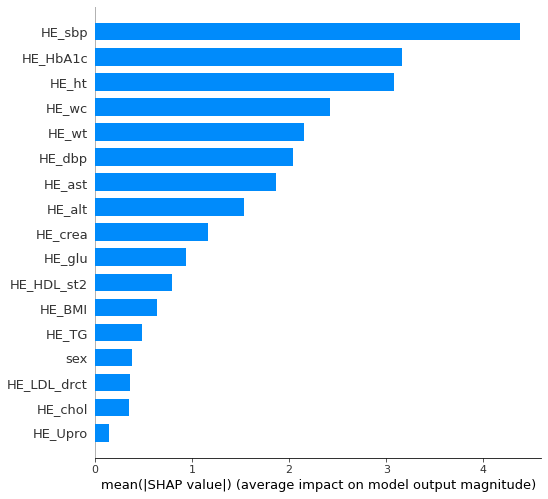

In [28]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_1).shap_values(total_x_test)
shap.summary_plot(shap_values, total_x_test, plot_type="bar")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.056004
[LightGBM] [Debug] init for col-wise cost 0.000012 seconds, init for row-wise cost 0.001379 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001799 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2396
[LightGBM] [Info] Number of data points in the train set: 3329, number of used features: 16
[LightGBM] [Info] Start training from score 50.066086
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 124 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 34 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 62 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 57 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 65 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 43 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 22 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 23 and depth = 9
[LightGBM] [Warning]

Text(0, 0.5, 'predict')

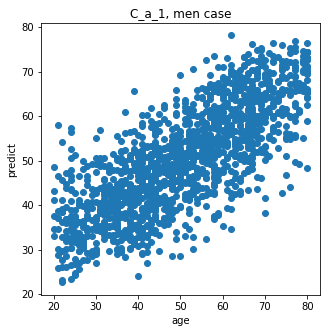

In [29]:
plt.rcParams["figure.figsize"] = (5, 5)

men_x_train, men_x_test, men_y_train, men_y_test= train_test_split(features_men,target_men,test_size=0.3,random_state=200)

lgb_reg_2 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100) 
lgb_reg_2.fit(men_x_train, men_y_train)

answer = pd.DataFrame(men_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_2.predict(men_x_test))
plt.title("C_a_1, men case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of men Importance in C_a_1')

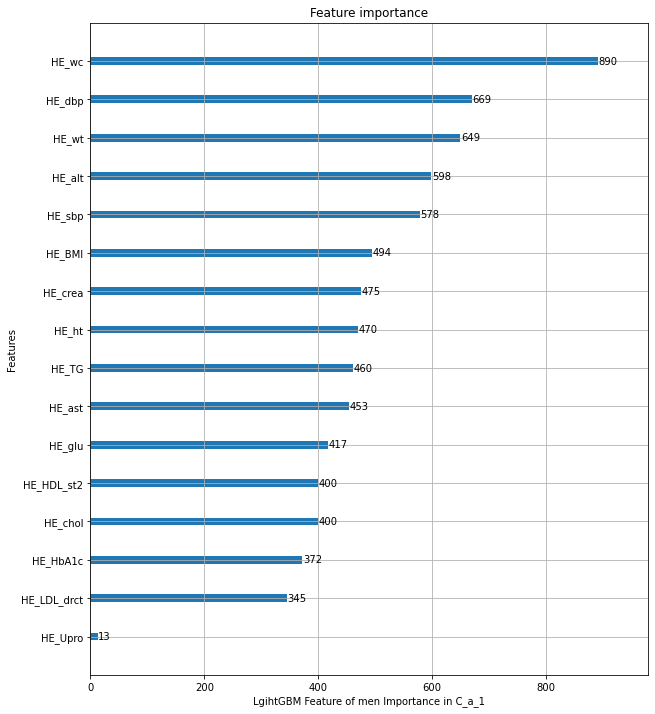

In [30]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_2, ax=ax)
plt.xlabel("LgihtGBM Feature of men Importance in C_a_1")

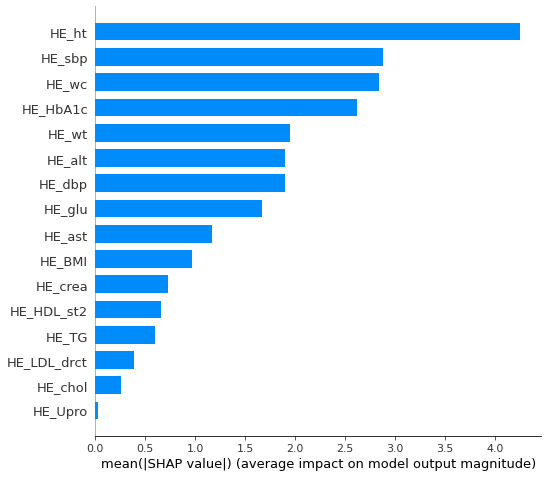

In [31]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_2).shap_values(men_x_test)
shap.summary_plot(shap_values, men_x_test, plot_type="bar")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.058595
[LightGBM] [Debug] init for col-wise cost 0.000011 seconds, init for row-wise cost 0.004092 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 2314
[LightGBM] [Info] Number of data points in the train set: 3233, number of used features: 16
[LightGBM] [Info] Start training from score 52.033406
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 110 and depth = 9
[LightGBM] [

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 78 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 54 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 69 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 84 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 75 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 75 and depth = 9
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 73 and depth = 9
[LightGBM] [Warning]

Text(0, 0.5, 'predict')

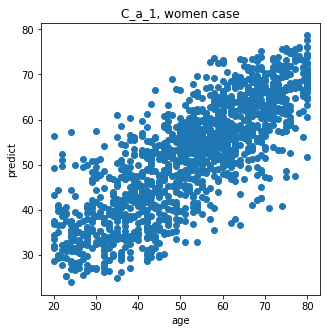

In [32]:
plt.rcParams["figure.figsize"] = (5, 5)

women_x_train, women_x_test, women_y_train, women_y_test= train_test_split(features_women,target_women,test_size=0.3,random_state=200)

lgb_reg_3 = LGBMRegressor(verbosity=50,learning_rate=0.05,boosting='gbdt',metric='regression_l2',max_depth=9,num_leaves=512,n_estimators=100)
lgb_reg_3.fit(women_x_train, women_y_train)

answer = pd.DataFrame(women_y_test.reset_index())
del answer["index"]

plt.scatter(answer,lgb_reg_3.predict(women_x_test))
plt.title("C_a_1, women case")
plt.xlabel("age")
plt.ylabel("predict")

Text(0.5, 0, 'LgihtGBM Feature of women Importance in C_a_1')

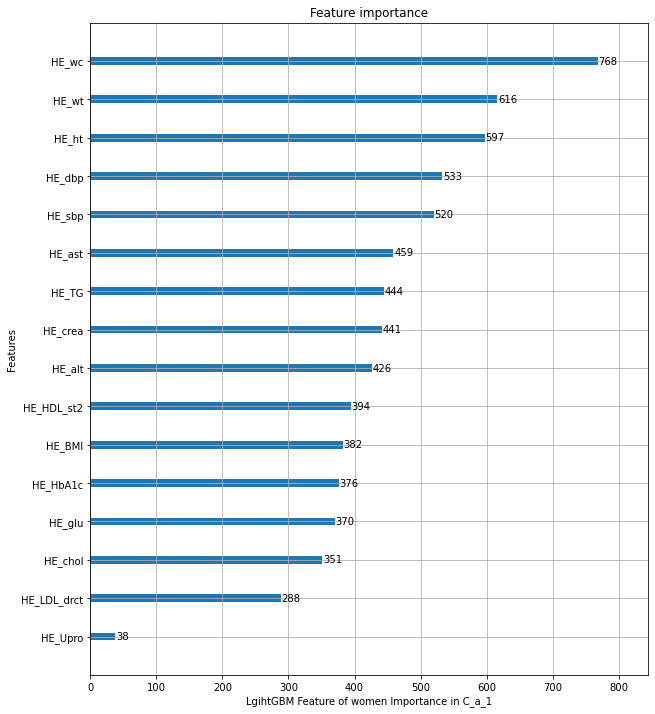

In [33]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb_reg_3, ax=ax)
plt.xlabel("LgihtGBM Feature of women Importance in C_a_1")

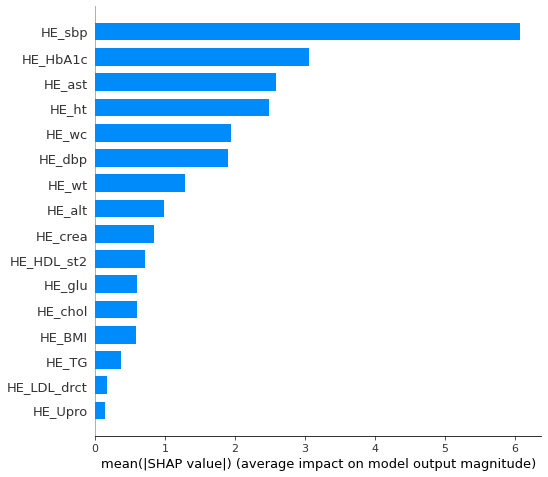

In [34]:
import shap

shap_values = shap.TreeExplainer(lgb_reg_3).shap_values(women_x_test)
shap.summary_plot(shap_values, women_x_test, plot_type="bar")